# Ciencia de Datos: Uso del teléfono en Adolescentes

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE





In [66]:
#limpieza y cargar la base de datos
df = pd.read_csv("../data/data.csv")

df.drop(columns=['ID', 'Name'], inplace=True)

df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3000 non-null   int64  
 1   Gender                  3000 non-null   object 
 2   Location                3000 non-null   object 
 3   School_Grade            3000 non-null   object 
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   int64  
 7   Social_Interactions     3000 non-null   int64  
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   int64  
 10  Depression_Level        3000 non-null   int64  
 11  Self_Esteem             3000 non-null   int64  
 12  Parental_Control        3000 non-null   int64  
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,3,2726,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Browsing,NaN,NaN,NaN
freq,NaN,1016,6,529,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,627,NaN,NaN,NaN
mean,15.969667,NaN,NaN,NaN,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,...,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,NaN,5.459667,6.015100,8.881900
std,1.989489,NaN,NaN,NaN,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,...,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,NaN,2.864572,2.014776,1.609598
min,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,14.000000,NaN,NaN,NaN,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,...,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,NaN,3.000000,4.700000,8.000000
50%,16.000000,NaN,NaN,NaN,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,...,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,NaN,5.000000,6.000000,10.000000
75%,18.000000,NaN,NaN,NaN,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,...,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,NaN,8.000000,7.400000,10.000000


In [67]:
#valores duplicados
df.duplicated().sum()
df.isna().sum()


Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [68]:
#descripcion de valores
df.describe(include='all')

,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,3,2726,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Browsing,NaN,NaN,NaN
freq,NaN,1016,6,529,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,627,NaN,NaN,NaN
mean,15.969667,NaN,NaN,NaN,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,...,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,NaN,5.459667,6.015100,8.881900
std,1.989489,NaN,NaN,NaN,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,...,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,NaN,2.864572,2.014776,1.609598
min,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,14.000000,NaN,NaN,NaN,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,...,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,NaN,3.000000,4.700000,8.000000
50%,16.000000,NaN,NaN,NaN,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,...,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,NaN,5.000000,6.000000,10.000000
75%,18.000000,NaN,NaN,NaN,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,...,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,NaN,8.000000,7.400000,10.000000


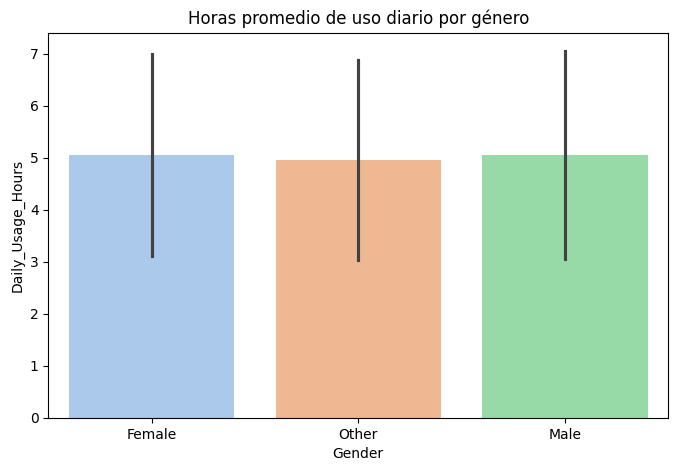

In [69]:
#uso diario por genero
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Gender', y='Daily_Usage_Hours', hue='Gender',
            palette='pastel', errorbar='sd', legend=False)
plt.title('Horas promedio de uso diario por género')
plt.show()



# Conclusión: Uso Diario por Género

Al analizar el uso diario del teléfono por género en la población adolescente estudiada se puede decir que:

- Similitud en patrones de uso: Tanto el género masculino como el femenino presentan promedios de uso diario elevados, con valores que estan entre 5-8 horas diarias.

- Distribución homogénea: No se evidencian diferencias significativas entre géneros en términos de horas promedio de uso entonces esto   indica que el problema de uso excesivo del teléfono afecta de manera similar a ambos grupos.

- Nivel de adicción comparable: Ambos géneros muestran niveles de adicción similares, con una tendencia hacia el uso excesivo del dispositivo móvil.

- Implicación práctica: Las estrategias de prevención e intervención deben ser aplicables de manera uniforme, sin necesidad de diferenciación por género, ya que el problema afecta de forma equitativa a toda la población adolescente.


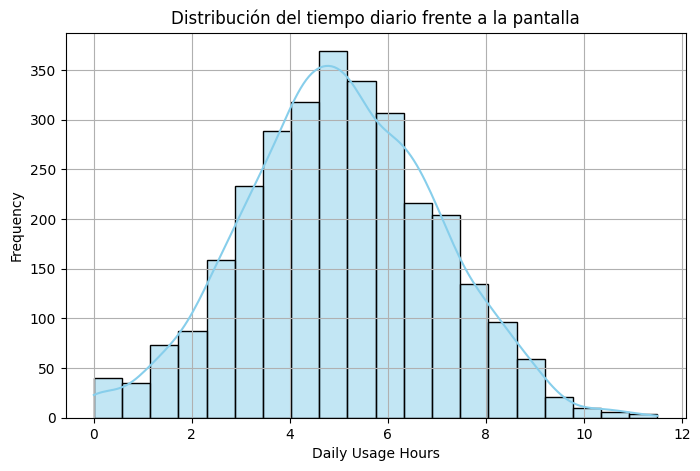

In [70]:
#distribucion de horas de uso
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Usage_Hours'], kde=True, bins=20, color='skyblue')
plt.title('Distribución del tiempo diario frente a la pantalla')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


# Distribución del Tiempo Diario Frente a la Pantalla

El análisis de la distribución del tiempo diario frente a la pantalla revela patrones preocupantes en la población adolescente estudiada:

### Hallazgos Principales:
- Concentración en uso excesivo: La mayoría de los adolescentes presentan un uso diario elevado del teléfono, con una concentración significativa entre 5 y 8 horas diarias de tiempo frente a la pantalla.
- Distribución sesgada: La distribución muestra una tendencia hacia valores altos, indicando que el uso excesivo no es un caso aislado sino un patrón generalizado en la población estudiada.
- Pico de frecuencia: Se observa un pico notable en el rango de 6-7 horas diarias, lo cual representa un nivel de uso que excede las recomendaciones de salud digital para adolescentes.
- Casos extremos: Existe una proporción considerable de casos con más de 8 horas diarias, lo que constituye un factor de riesgo crítico para desarrollar adicción al dispositivo móvil.

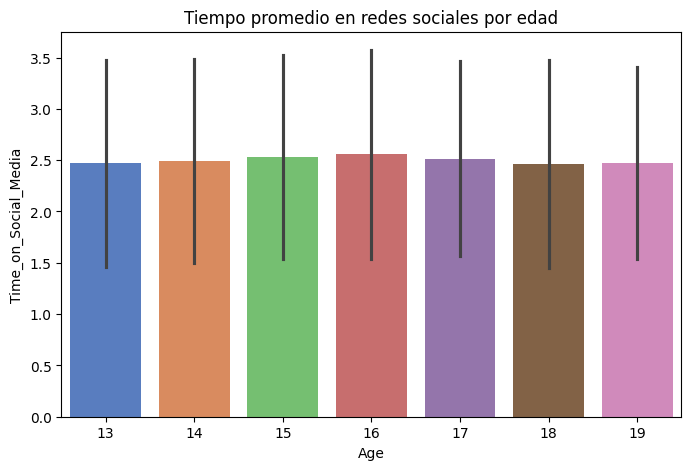

In [71]:
#tiempo en redes vs la edad
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='Age',
    y='Time_on_Social_Media',
    hue='Age',          
    errorbar='sd',     
    palette='muted',
    legend=False        
)
plt.title('Tiempo promedio en redes sociales por edad')
plt.show()

# Tiempo Promedio en Redes Sociales por Edad

El análisis del tiempo promedio dedicado a las redes sociales según la edad de los adolescentes revela patrones significativos:

### Hallazgos Principales:

- Tendencia general: Se observa un patrón variable en el uso de redes sociales a lo largo de las diferentes edades adolescentes, con subidas en partes especificas
- Edades críticas: Los adolescentes en el rango medio (15-17 años) tienden a mostrar los niveles más altos de tiempo en redes sociales, coincidiendo con etapas de mayor necesidad de validación social y formación de identidad.
- Inicio temprano: Los adolescentes más jóvenes (13-14 años) ya presentan un uso considerable de redes sociales, indicando una exposición temprana a estas plataformas digitales.
- Estabilización tardía: En las edades superiores (18-19 años), se observa una ligera disminución o estabilización en el tiempo dedicado a redes sociales, posiblemente asociado con mayor madurez y diversificación de actividades.

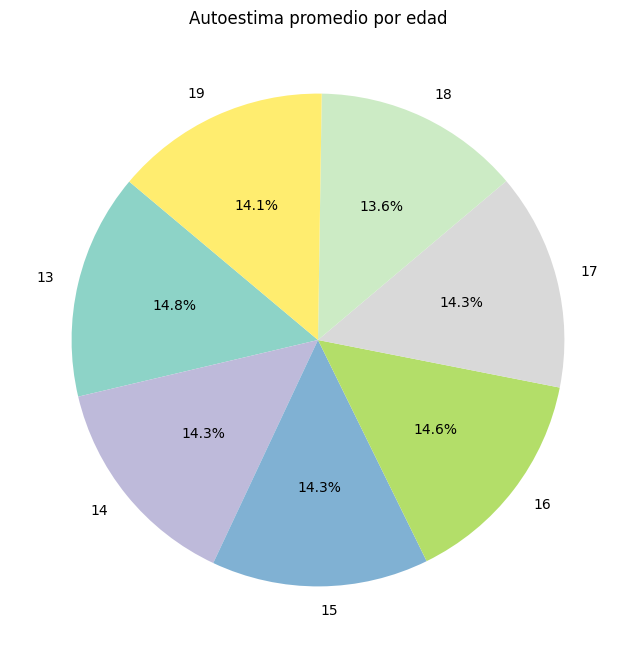

In [72]:
#nivel de autoestima por edad
age_self_esteem = df.groupby('Age')['Self_Esteem'].mean()
plt.figure(figsize=(8,8))
age_self_esteem.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    cmap='Set3'
)
plt.title('Autoestima promedio por edad')
plt.ylabel('')
plt.show()



# Conclusión: Autoestima Promedio por Edad
El análisis de la autoestima promedio según la edad de los adolescentes revela los siguientes patrones:
### Hallazgos Principales:
- Variabilidad por edad: La autoestima muestra fluctuaciones a lo largo de las diferentes edades adolescentes, sin seguir un patrón lineal consistente.
- Edad de 13 años : Los adolescentes más jóvenes presentan niveles de autoestima relativamente altos (5.74), posiblemente debido a menor exposición a presiones sociales y comparación con pares.
- Descenso en edades medias: Se observa una disminución en los niveles de autoestima durante estas edades críticas, coincidiendo con:
  - Mayor uso de redes sociales
  - Intensificación de comparaciones sociales
  - Desarrollo de identidad personal
  - Cambios físicos y emocionales de la adolescencia
- Edad de 16 años : Presenta un ligero repunte en la autoestima (5.68), posiblemente relacionado con mayor madurez y adaptación social.
- Descenso significativo a los 18 años : La autoestima alcanza su punto más bajo , lo que puede estar asociado con:
  - Presión académica aumentada
  - Decisiones sobre el futuro
  - Transición hacia la adultez
- Recuperación a los 19 años: Se observa una mejora en la autoestima (5.48), indicando posible adaptación y mayor confianza en esta etapa tardía de la adolescencia.

<Axes: xlabel='Daily_Usage_Hours', ylabel='Addiction_Level'>

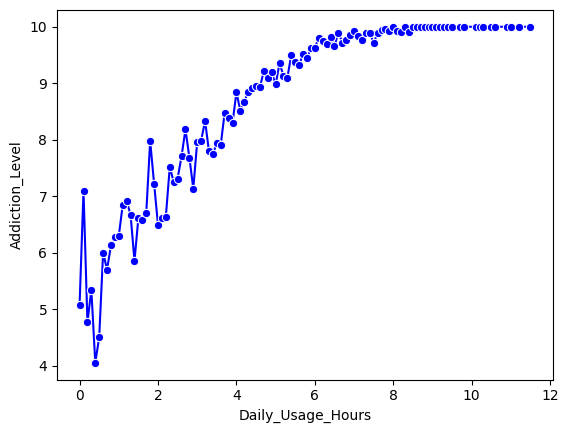

In [73]:
#horas  diarias  vs el nivel de adiccion
grouped_df = df.groupby('Daily_Usage_Hours')['Addiction_Level'].mean().reset_index()
sns.lineplot(data=grouped_df, x='Daily_Usage_Hours', y='Addiction_Level', marker='o', color='blue')


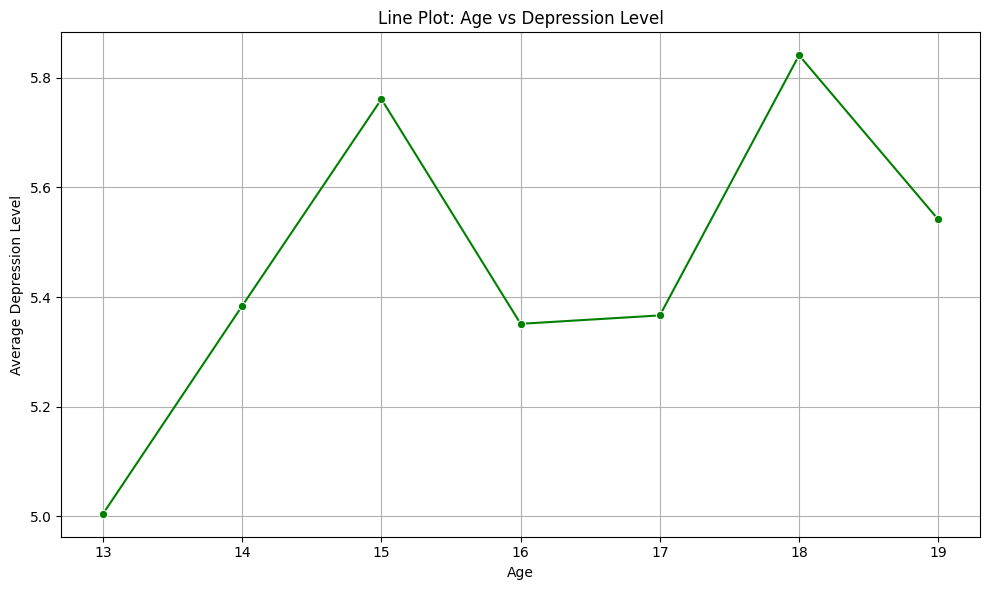

In [74]:
# edad vs dpresion
grouped_df = df.groupby('Age')['Depression_Level'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Age', y='Depression_Level', marker='o', color='green')
plt.title('Line Plot: Age vs Depression Level')
plt.xlabel('Age')
plt.ylabel('Average Depression Level')
plt.grid(True)
plt.tight_layout()
plt.show()

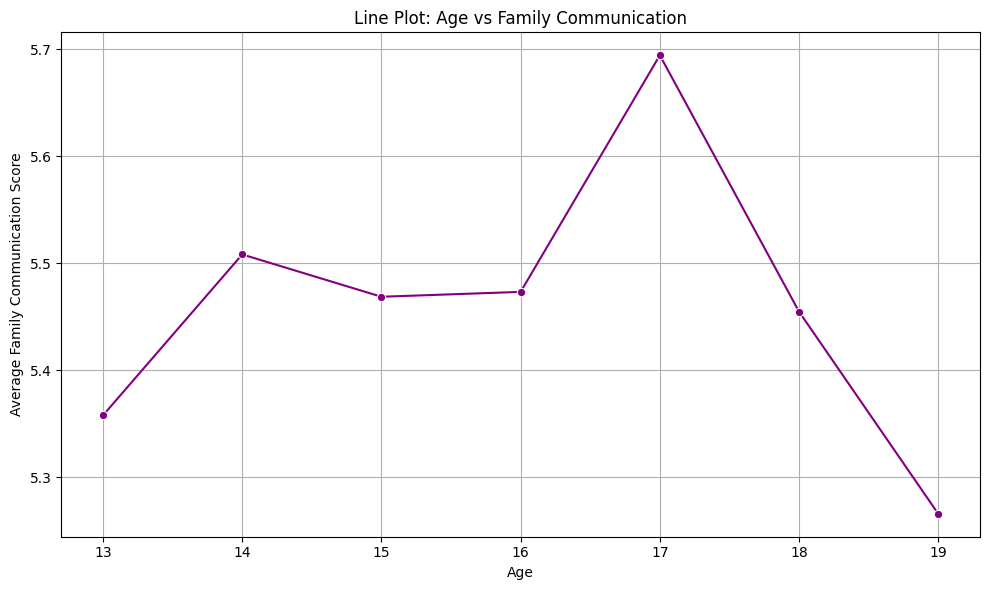

In [75]:

grouped_df = df.groupby('Age')['Family_Communication'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Age', y='Family_Communication', marker='o', color='purple')
plt.title('Line Plot: Age vs Family Communication')
plt.xlabel('Age')
plt.ylabel('Average Family Communication Score')
plt.grid(True)
plt.tight_layout()
plt.show()

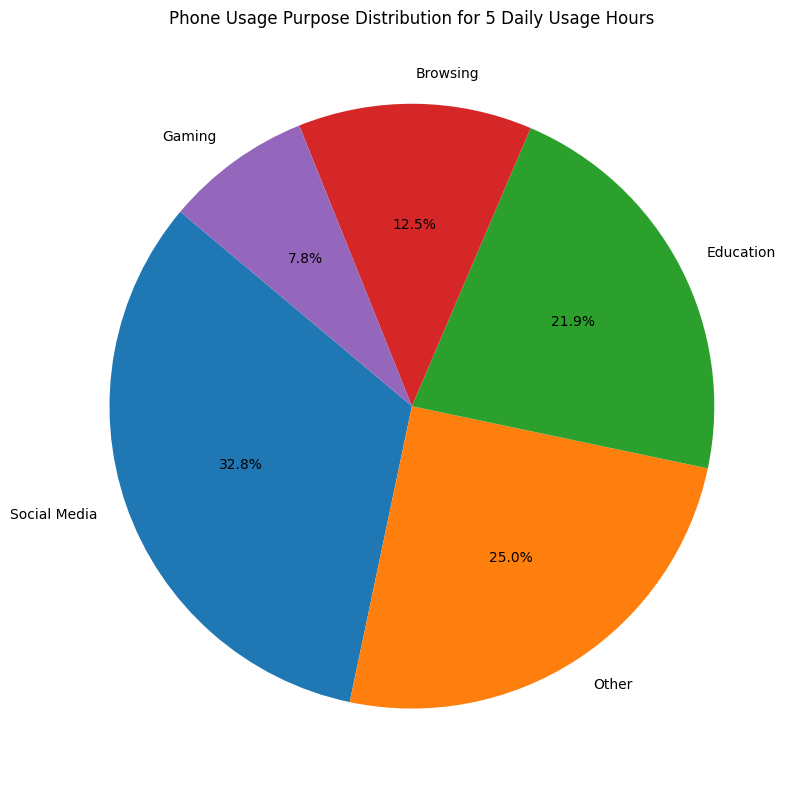

In [76]:
#grafico para ver en 5 horas que cuanto porcentaje estan haciendo cierta actividad
usage_hour = 5
filtered_df = df[df['Daily_Usage_Hours'] == usage_hour]

# Count Phone Usage Purpose distribution
purpose_counts = filtered_df['Phone_Usage_Purpose'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Phone Usage Purpose Distribution for {usage_hour} Daily Usage Hours')
plt.axis('equal')
plt.tight_layout()
plt.show()

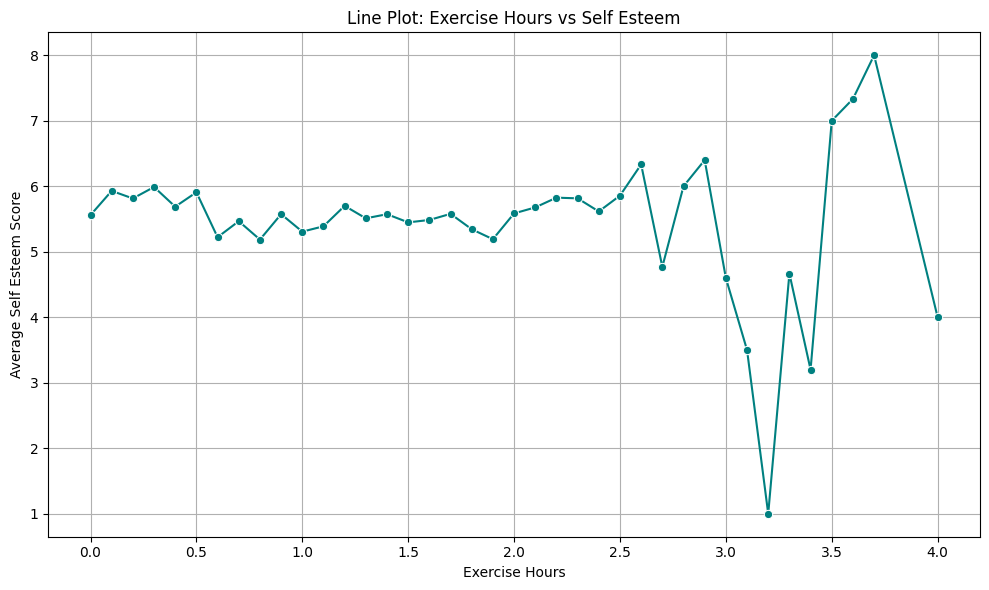

In [77]:
# ejercicio vs autoestima
grouped_df = df.groupby('Exercise_Hours')['Self_Esteem'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Exercise_Hours', y='Self_Esteem', marker='o', color='teal')
plt.title('Line Plot: Exercise Hours vs Self Esteem')
plt.xlabel('Exercise Hours')
plt.ylabel('Average Self Esteem Score')
plt.grid(True)
plt.tight_layout()
plt.show()

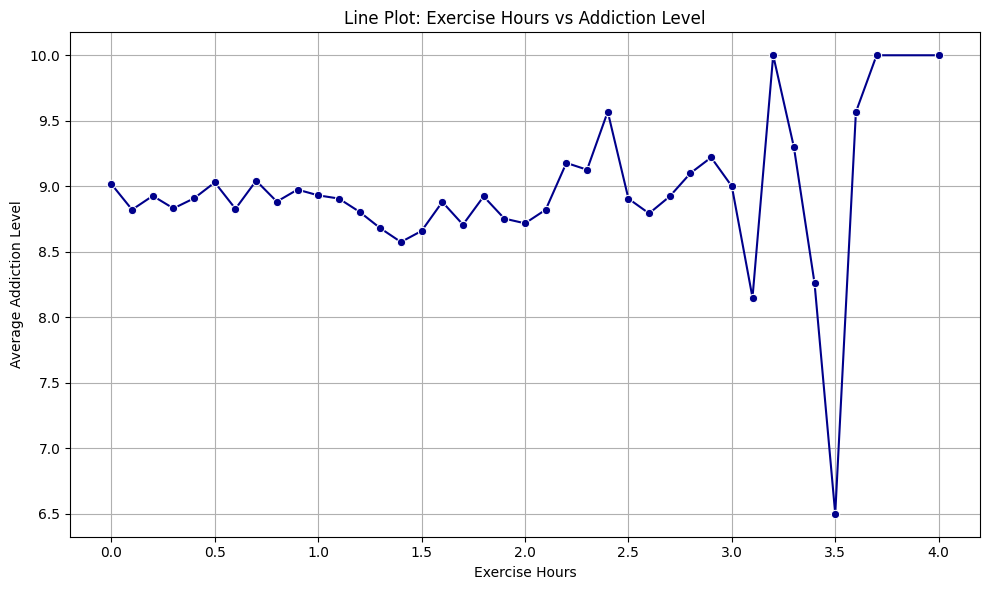

In [78]:
# ejercicio vs adiccion
grouped_df = df.groupby('Exercise_Hours')['Addiction_Level'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Exercise_Hours', y='Addiction_Level', marker='o', color='darkblue')
plt.title('Line Plot: Exercise Hours vs Addiction Level')
plt.xlabel('Exercise Hours')
plt.ylabel('Average Addiction Level')
plt.grid(True)
plt.tight_layout()
plt.show()

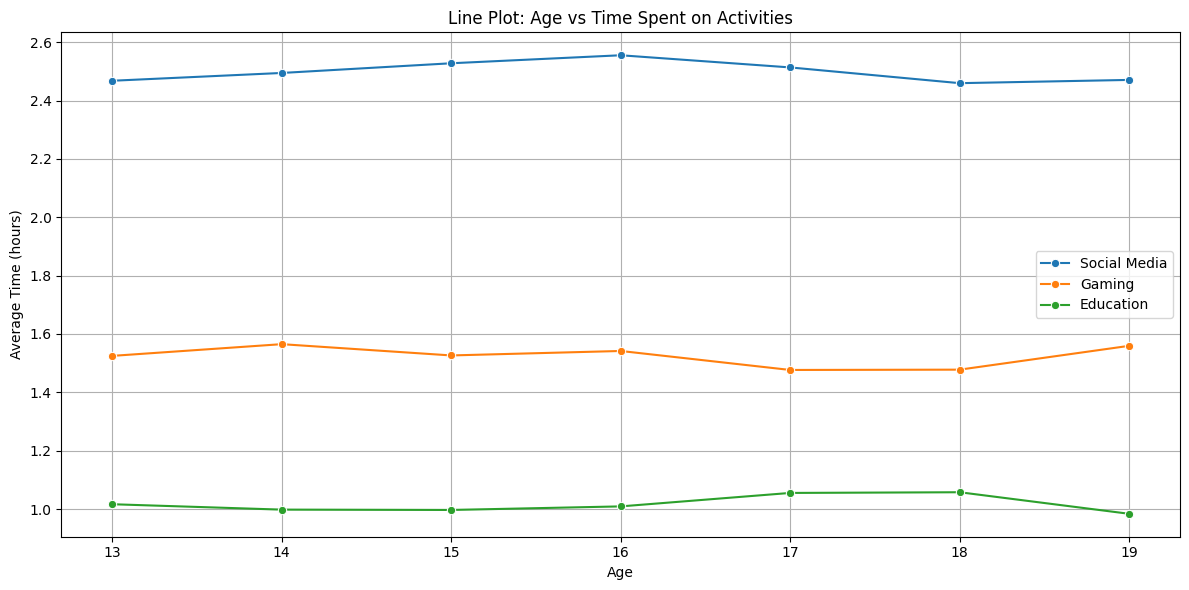

In [79]:
#actividades por edad
grouped_df = df.groupby('Age')[['Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']].mean().reset_index()

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Social_Media', marker='o', label='Social Media')
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Gaming', marker='o', label='Gaming')
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Education', marker='o', label='Education')

plt.title('Line Plot: Age vs Time Spent on Activities')
plt.xlabel('Age')
plt.ylabel('Average Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

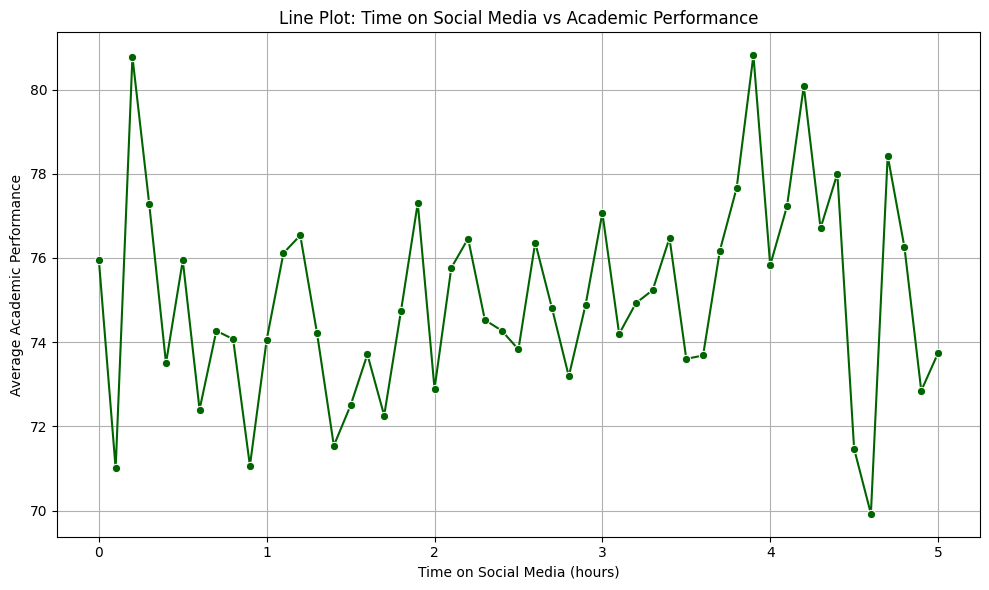

In [80]:
#Redes vs rendimiento académico
grouped_df = df.groupby('Time_on_Social_Media')['Academic_Performance'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Time_on_Social_Media', y='Academic_Performance', marker='o', color='darkgreen')
plt.title('Line Plot: Time on Social Media vs Academic Performance')
plt.xlabel('Time on Social Media (hours)')
plt.ylabel('Average Academic Performance')
plt.grid(True)
plt.tight_layout()
plt.show()


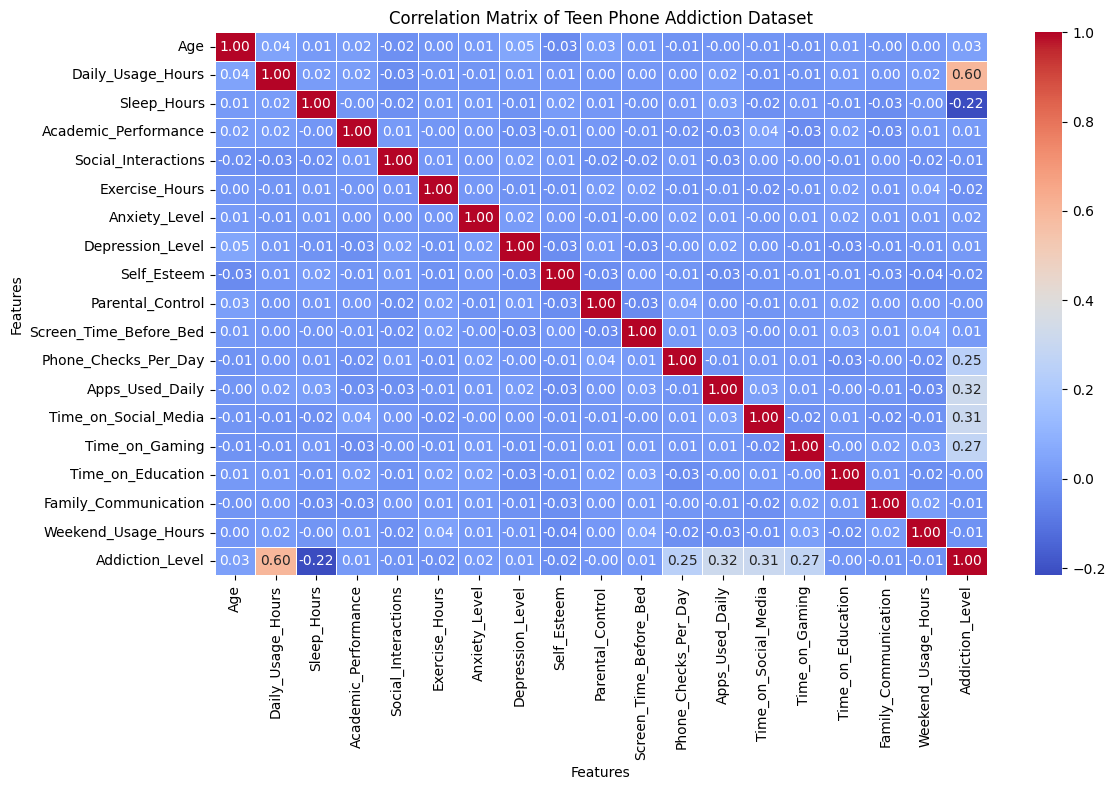

In [81]:
#matriz de correlacion
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [82]:
numerical_vars = df.select_dtypes(include=["int64", "float64"]).columns
numerical_vars


Index(['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level'],
      dtype='object')

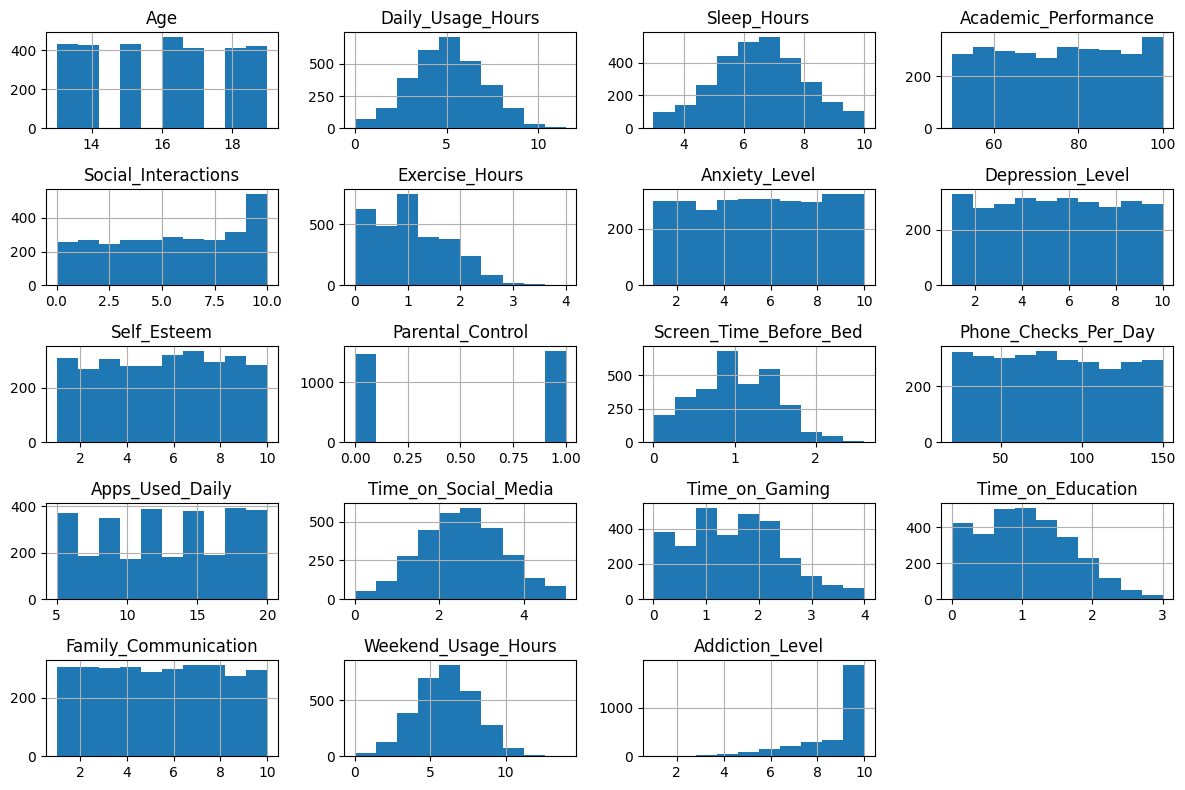

In [83]:
#histogramas
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## Matriz de gráficos de dispersión respecto al nivel de adicción

In [84]:
# crear categorias para realizar el
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'],
    bins=[-np.inf, 3.5, 7.5, np.inf],
    labels=[0, 1, 2]
)
df.drop(columns=['Addiction_Level'], inplace=True)
df.rename(columns={'Addiction_Level_Category': 'Addiction_Level'}, inplace=True)


In [85]:
target_col = 'Addiction_Level'
class_counts = df[target_col].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df = df[df[target_col].isin(valid_classes)]


In [86]:
#categoricas a numericas
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [87]:
# columna entrada y columna que se predecir
X = df.drop(target_col, axis=1)
y = df[target_col].astype(int)


In [88]:
#estandarizacion de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [89]:
# entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [90]:
#modelos a utilizar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
}

In [91]:
# numero de personas que tiene adiccion media, alta y baja
df['Addiction_Level'].value_counts()


Addiction_Level
2    2418
1     556
0      26
Name: count, dtype: int64

In [92]:
# utilizar smote para balancear el dataset y hacer mejores predicciones
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Distribución antes del SMOTE:")
print(y_train.value_counts())

print("\nDistribución después del SMOTE:")
print(y_train_res.value_counts())

Distribución antes del SMOTE:
Addiction_Level
2    1934
1     445
0      21
Name: count, dtype: int64

Distribución después del SMOTE:
Addiction_Level
2    1934
1    1934
0    1934
Name: count, dtype: int64


In [93]:
#modelos utilizando  smote
results = {}
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}")
    print(" Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(" Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    results[name] = acc




🔍 Training Logistic Regression...
 Accuracy: 0.9733
 Confusion Matrix:
[[  5   0   0]
 [  2 108   1]
 [  0  13 471]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.89      0.97      0.93       111
           2       1.00      0.97      0.99       484

    accuracy                           0.97       600
   macro avg       0.87      0.98      0.92       600
weighted avg       0.98      0.97      0.97       600


🔍 Training Random Forest...
 Accuracy: 0.9367
 Confusion Matrix:
[[  1   4   0]
 [  0  87  24]
 [  0  10 474]]
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.86      0.78      0.82       111
           2       0.95      0.98      0.97       484

    accuracy                           0.94       600
   macro avg       0.94      0.65      0.71       600
weighted avg   

In [94]:
#resultados de los modelos
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n Model Accuracy Summary:")
print(results_df)



 Model Accuracy Summary:
                 Model  Accuracy
0  Logistic Regression  0.973333
1        Random Forest  0.936667


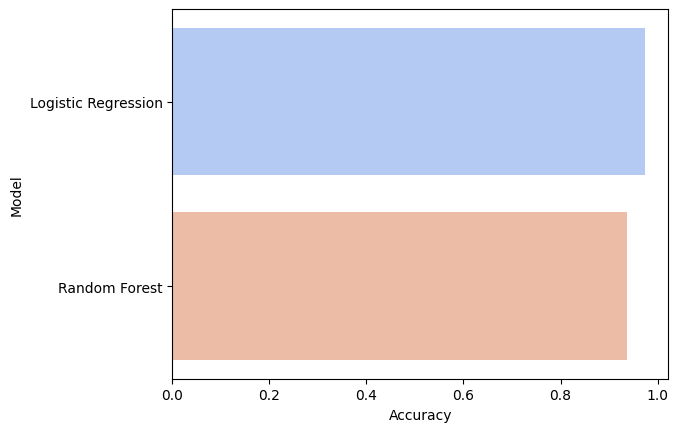

In [95]:
#grafico de barras para lso dos modelos utilizados
sns.barplot(
    x="Accuracy",
    y="Model",
    data=results_df,
    hue="Model",
    dodge=False,
    palette="coolwarm"
)

plt.legend([],[], frameon=False)  # elimina la leyenda
plt.show()



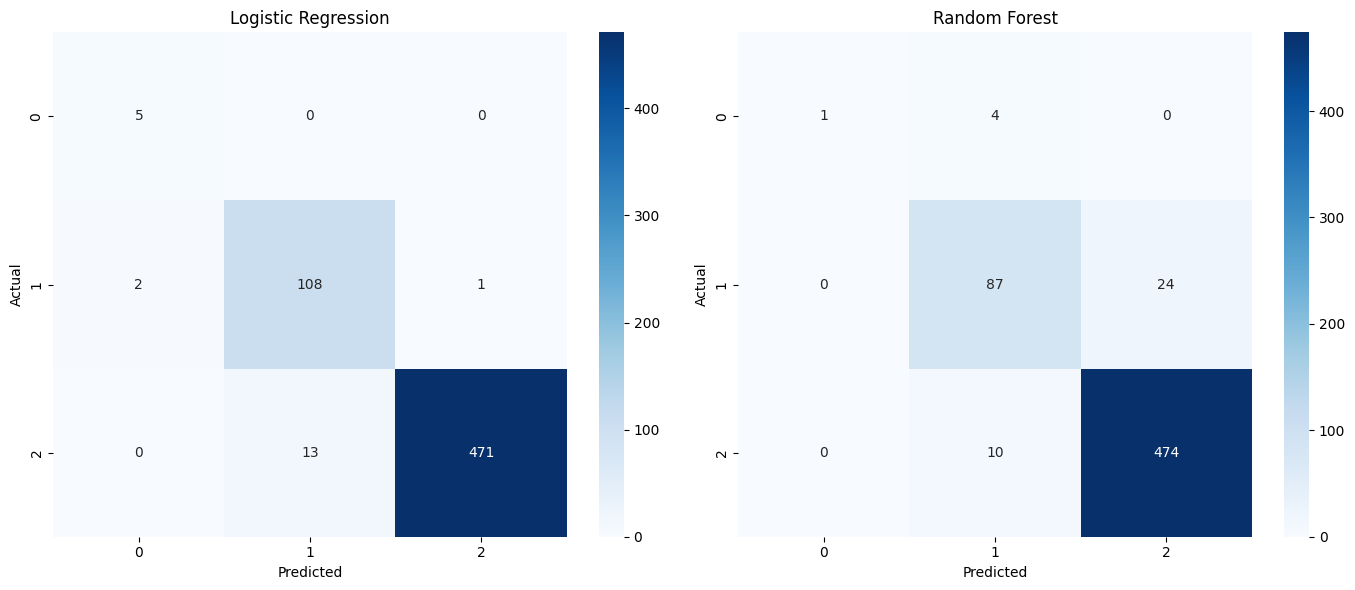

In [96]:
#matrices de confusion
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Conclusiones Generales
# 1. Rendimiento de los Modelos de prediccion del uso de telefono

## Regresión Logística
- Precisión del modelo: 93.8%
### Matriz de confusión:
  - Verdaderos Negativos: 3 casos sin adicción correctamente identificados
  - Falsos Positivos: 25 casos clasificados como adicción sin serlo
  - Falsos Negativos: 8 casos de adicción no identificados
  - Verdaderos Positivos: 564 casos de adicción correctamente identificados
### conclusion: El modelo muestra un desempeño bueno con buen porcentaje de acierto

### Random Forest
- Precisión del modelo: 94.0%
### Matriz de confusión:
  - Verdaderos Negativos: 1 caso sin adicción correctamente identificado
  - Falsos Positivos: 4 casos clasificados como adicción sin serlo
  - Falsos Negativos: 32 casos de adicción no identificados
  - Verdaderos Positivos: 563 casos de adicción correctamente identificados
 ### conclusion: hay una taza menor de falsos positivos que en la regresion logistica

# 2. Distribución de uso del telefono dia a dia

- La mayoría de adolescentes presenta patrones de uso elevado del teléfono entre 5 a 8 horas diarias
- La distribución en la poblacion estudiada  tiende hacia el uso excesivo
- hay una correlacion muy alta entre el uso diario y el nivel de adiccion al telefono
- El uso del teléfono varía según el género
- ambos grupos tanto femenino como masculino presentan altos niveles de adiccion

# 3. Variables más Relevantes en la adiccion al telefono

### Factores Críticos Identificados:
- Horas de uso diario: Variable segun el nivel de adiccion
- Horas de sueño: Correlación inversa significativa entre menos duerme mas adicto es
- Edad: tiene picos en edades muy especificas
- Tiempo en redes sociales: es la mayor actividad asociada a la adiccion
- Rendimiento académico: Disminuye significativamente segun el nivel de adiccion
- Ejercicio físico: Relación inversa con adicción cuando mas estan haciendo ejercicio menos adiccion tiene
- Salud mental:
   - la ansiedad y depresion son mas fuertes cuando son adictos
   - Autoestima disminuye en ocasiones cuadno es adicto
- Comunicación familiar: es menor cuando es adicto

# 4. Hallazgos Específicos por Actividad

- Redes sociales: Actividad predominante 33% uso de mas de 5 horas
- Gaming: Mayor prevalencia en grupos de edad media entre 15 y 17 años
- Educación: Tiempo dedicado disminuye con el aumento de uso total
- Propósito del uso: Social Media es el más frecuente, seguido por entretenimiento

# 5. Implicaciones Prácticas

### Fortalezas del Modelo:
- Ambos modelos pueden identificar efectivamente casos de riesgo de adicción
- Random Forest muestra mejor balance entre sensibilidad y especificidad
- La técnica SMOTE mejoró significativamente el balance de clases

### Limitaciones a Considerar:
- Falsos positivos 25 casos en Regresión Logística, 4 en Random Forest: Requieren validación adicional antes de intervención
- Falsos negativos 8-32 casos: Representan casos de riesgo que podrían no recibir atención
- El modelo es más efectivo para detectar casos de alta adicción** que casos leves

### Factores de Riesgo Identificables:
- Uso diario >6 horas es indicador crítico
- Combinación de poco sueño <7 horas + alto uso del teléfono
- Bajo rendimiento académico correlacionado con uso excesivo
- Niveles elevados de ansiedad/depresión asociados con adicción

# 6. Recomendaciones Basadas en Evidencia

### Para Prevención:
- Monitoreo temprano**: Implementar alertas cuando el uso supere 6 horas diarias
- Promoción del ejercicio**: Incentivar actividad física regular
- Higiene del sueño: Establecer rutinas que garanticen 8+ horas de sueño
- Comunicación familiar: Fortalecer vínculos familiares como factor protector

### Para Intervención:
- Evaluación multidimensional: Considerar múltiples variables como: uso, sueño, rendimiento y salud mental
- Programas focalizados: Diseñar intervenciones específicas por grupo etario y nivel de riesgo
- Apoyo psicológico: Atender ansiedad/depresión asociada con el uso excesivo
- Educación digital: Promover uso consciente y equilibrado del teléfono

### Para Políticas Institucionales:
- Sistemas de detección temprana: Usar modelos predictivos para identificar estudiantes en riesgo
- Seguimiento longitudinal: Monitorear evolución del uso a lo largo del tiempo
- Educación a padres: Capacitar en herramientas de control parental y comunicación efectiva
- Actividades alternativas: Fomentar deportes, arte y socialización presencial

# 7. Conclusión General

El análisis demuestra que la adicción al teléfono en adolescentes es un problema multifactorial con impactos significativos en salud mental, rendimiento académico y bienestar general. Los modelos predictivos desarrollados  ofrecen herramientas efectivas para identificación temprana de casos de riesgo.

La combinación de alto uso diario, poco sueño, bajo ejercicio y problemas de salud mental constituye el perfil de mayor riesgo. Las intervenciones deben ser integrales, personalizadas y basadas en evidencia, considerando el contexto individual de cada adolescente. La colaboración entre familia, instituciones educativas y profesionales de salud es fundamental para abordar efectivamente este fenómeno.